In [253]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

In [254]:
reviews = pd.read_csv('MovieLens_Dataset/u.data', names=['userId', 'movieId', 'rating', 'time'], sep='\t', engine='python', header=None, encoding='latin-1')

movies = pd.read_csv('MovieLens_Dataset/u.item', names=['movieId', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], sep='|', engine='python', header=None, encoding='latin-1')

user = pd.read_csv('MovieLens_Dataset/u.user', names=['userId', 'age', 'gender', 'occupation', 'zip code'], sep='|', engine='python', header=None, encoding='latin-1')

genre = pd.read_csv('MovieLens_Dataset/u.genre', names=['genre', 'genreId'], sep='|', engine='python', header=None, encoding='latin-1')

occupation = pd.read_csv('MovieLens_Dataset/u.occupation', names=['occupation'], engine='python', header=None, encoding='latin-1')

# Data Analysis

As a first step, the data of the Movielens dataset are analyzed to get a rough overview of what information is given. First, a data frame is created in which all data can be called up collectively.

In [255]:
df_mixed = pd.merge(reviews, movies, on='movieId', how='left')
df_final = pd.merge(df_mixed, user, on='userId', how='left')

df_final.head()

,userId,movieId,rating,time,movie title,release date,video release date,IMDb URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,47,M,educator,55113


The first step in the analysis is to look at how many ratings and what amount were given in total.

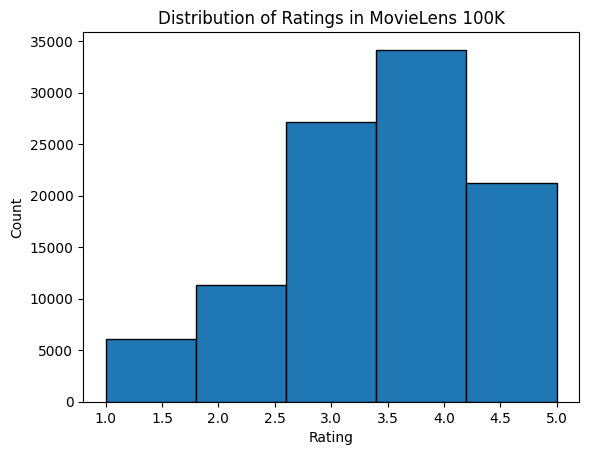

In [256]:
plt.hist(reviews['rating'], bins=5, ec='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in MovieLens 100K')
plt.show()

In [257]:
gender_counts = user['gender'].value_counts()

colors1 = ['dodgerblue', 'pink']

pie = go.Pie(labels=gender_counts.index,
             values=gender_counts.values,
             marker=dict(colors=colors1),
             hole=0.5)

layout = go.Layout(title='Male & Female users', font=dict(size=18), legend=dict(orientation='h'))

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

A look at the age groups shows that many younger people in particular gave their opinion on the films.

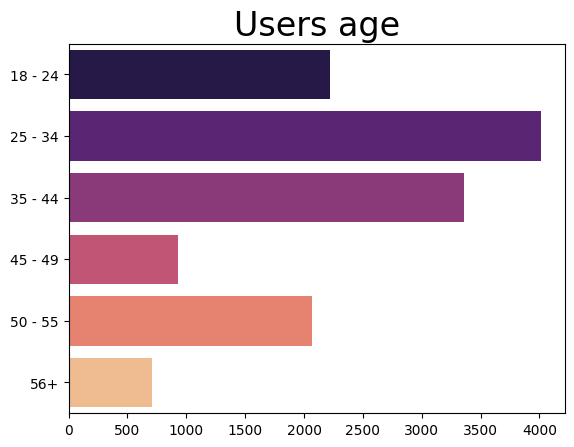

In [258]:
ages_map = {18: '18 - 24',
            25: '25 - 34',
            35: '35 - 44',
            45: '45 - 49',
            50: '50 - 55',
            56: '56+'}

df_final['age'] = df_final['age'].map(ages_map)

age_reindex = ['18 - 24', '25 - 34', '35 - 44', '45 - 49', '50 - 55', '56+']

age_counts = df_final['age'].value_counts().reindex(age_reindex)

sns.barplot(x=age_counts.values,
            y=age_counts.index,
            palette='magma').set_title(
                'Users age', fontsize=24)
plt.show()

In addition, it is possible to display which films were rated the most by which age group. In this case, Star Wars was rated the most by 25-34 year olds.

In [259]:
df_final[df_final['age'] == '25 - 34']['movie title'].value_counts()[:7]

Star Wars (1977)                   28
Return of the Jedi (1983)          25
Star Trek: First Contact (1996)    24
Independence Day (ID4) (1996)      23
Liar Liar (1997)                   23
Toy Story (1995)                   22
Raiders of the Lost Ark (1981)     21
Name: movie title, dtype: int64

The following graphic also corresponds to the previous findings. By far the most popular vocation among the rating users is studying.

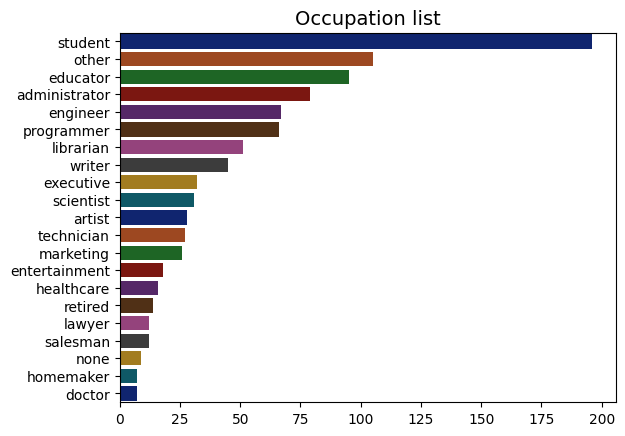

In [260]:
occupation_counts = user['occupation'].value_counts().sort_values(ascending=False)

sns.barplot(x=occupation_counts.values,
            y=occupation_counts.index,
            palette='dark').set_title(
                'Occupation list', fontsize=14)

plt.show()

Finally, the films that were rated either the best or the most frequently are displayed.

In [261]:
df_top_review = df_final.groupby(['movieId', 'movie title']).agg({'rating': 'mean', 'userId': 'count'}).rename(columns={'userId': 'n_reviews'})
df_top_review = df_top_review[df_top_review.n_reviews > 10]
df_top_review.sort_values('rating', ascending=False)[:10]

,,rating,n_reviews
movieId,movie title,,
408,"Close Shave, A (1995)",4.491071,112
318,Schindler's List (1993),4.466443,298
169,"Wrong Trousers, The (1993)",4.466102,118
483,Casablanca (1942),4.456790,243
114,Wallace & Gromit: The Best of Aardman Animation (1996),4.447761,67
64,"Shawshank Redemption, The (1994)",4.445230,283
603,Rear Window (1954),4.387560,209
12,"Usual Suspects, The (1995)",4.385768,267
50,Star Wars (1977),4.358491,583


In [262]:
df_top_review.sort_values('n_reviews', ascending=False)[:10]

,,rating,n_reviews
movieId,movie title,,
50,Star Wars (1977),4.358491,583
258,Contact (1997),3.803536,509
100,Fargo (1996),4.155512,508
181,Return of the Jedi (1983),4.007890,507
294,Liar Liar (1997),3.156701,485
286,"English Patient, The (1996)",3.656965,481
288,Scream (1996),3.441423,478
1,Toy Story (1995),3.878319,452
300,Air Force One (1997),3.631090,431


Unfortunately, the analyzed data will not be taken into account in the further course. That's because I've only found recommender systems that use content-based filtering with multiple input variables on the user side that were incomprehensible to my level of knowledge.
For this reason, a recommender system based on collaborative filtering is used below. This procedure finds users who have rated the same movies well. As a result, the user will be suggested movies that he has not yet rated, but which the user with similar interests has found to be good. Only the UserIDs and their ratings for the films are relevant for this. However, the exact characteristics of the users are irrelevant.

# Pre processing Data

To start with the model, the data must first be adjusted. To do this, all irrelevant data is removed from the data frame. For this model, only the UserID and its rating of the films is relevant.

In [263]:
df_final.drop(['movie title', 'video release date', 'IMDb URL', 'release date', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'zip code', 'age', 'gender', 'occupation', 'time'], axis=1, inplace=True)

Here the data sets for training and validation, a list of all User IDs and Movie IDs are created.

In [264]:
df_train, df_val = train_test_split(df_final, random_state=42, test_size=0.2, stratify=df_final.rating)

userIds = df_final['userId'].unique().tolist()
num_unique_users = len(userIds)

movieIds = df_final['movieId'].unique().tolist()
num_unique_movies = len(movieIds)

dict_movies = {}
index = 0
for ids in sorted(movieIds):
    dict_movies[ids] = index
    index += 1

dict_users = {}
index = 0
for ids in sorted(userIds):
    dict_users[ids] = index
    index += 1

df_train['movieId'] = df_train['movieId'].map(dict_movies)
df_val['movieId'] = df_val['movieId'].map(dict_movies)

df_train['userId'] = df_train['userId'].map(dict_users)
df_val['userId'] = df_val['userId'].map(dict_users)

for col in ['userId', 'movieId', 'rating']:
    df_train[col] = df_train[col].astype(np.float32)
    df_val[col] = df_val[col].astype(np.float32)

# Model

For the model, Keras creates embeddings once for the users and once for the movies. In the next step, the embeddings are multiplied with each other and the biases are added. Then, as in the deep dive tutorial, a flattening and a dense layer follow to level and activate the input values.

In [265]:
EMBEDDING_SIZE = 128

users_input = keras.Input(shape=(1,), name='users_input')
users_embedding = tf.keras.layers.Embedding(num_unique_users + 1, EMBEDDING_SIZE, name='users_embeddings')(users_input)
users_bias = tf.keras.layers.Embedding(num_unique_users + 1, 1, name='users_bias')(users_input)

movies_input = keras.Input(shape=(1,), name='movies_input')
movies_embedding = tf.keras.layers.Embedding(num_unique_movies + 1, EMBEDDING_SIZE, name='movies_embeddings')(movies_input)
movies_bias = tf.keras.layers.Embedding(num_unique_movies + 1, 1, name='movies_bias')(movies_input)

dot_product_users_movies = tf.keras.layers.multiply([users_embedding, movies_embedding])
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = tf.keras.layers.Flatten(name='fl_inputs')(input_terms)
output = tf.keras.layers.Dense(1, activation='relu', name='output')(input_terms)
model = tf.keras.Model(inputs=[users_input, movies_input], outputs=output)

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 128)       120832      ['users_input[0][0]']            
                                                                                                  
 movies_embeddings (Embedding)  (None, 1, 128)       215424      ['movies_input[0][0]']           
                                                                                            

In [266]:
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

In [267]:
model.fit(x=[df_train.userId, df_train.movieId], y=df_train.rating, batch_size=512, epochs=10, verbose=1, validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/10
157/157 [==============================] - 4s 11ms/step - loss: 6.7566 - mean_absolute_error: 2.1844 - val_loss: 1.3865 - val_mean_absolute_error: 0.9403
Epoch 2/10
157/157 [==============================] - 1s 7ms/step - loss: 1.0743 - mean_absolute_error: 0.8184 - val_loss: 0.9559 - val_mean_absolute_error: 0.7725
Epoch 3/10
157/157 [==============================] - 1s 7ms/step - loss: 0.8962 - mean_absolute_error: 0.7473 - val_loss: 0.9086 - val_mean_absolute_error: 0.7518
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.8582 - mean_absolute_error: 0.7307 - val_loss: 0.8909 - val_mean_absolute_error: 0.7447
Epoch 5/10
157/157 [==============================] - 2s 13ms/step - loss: 0.8281 - mean_absolute_error: 0.7177 - val_loss: 0.8761 - val_mean_absolute_error: 0.7360
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.7886 - mean_absolute_error: 0.6994 - val_loss: 0.8584 - val_mean_absolute_error: 0.7295
Epoch 7/10
1

In [268]:
min_rating=min(df_train.rating.min(), df_val.rating.min())
max_rating=max(df_train.rating.max(), df_val.rating.max())

As a supplement, the output layer is set to the minimum and maximum values ​​of the assessment and a sigmoid activation. This can reduce the loss. The learning rate of 0.001 remains the same.

In [269]:
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(input_terms) 
output = output * (max_rating - min_rating) + min_rating

In [270]:
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])
model.fit(x=[df_train.userId, df_train.movieId], y=df_train.rating, batch_size=2048, epochs=5, verbose=1, validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/5
40/40 [==============================] - 2s 20ms/step - loss: 0.5204 - mean_absolute_error: 0.5634 - val_loss: 0.8234 - val_mean_absolute_error: 0.7134
Epoch 2/5
40/40 [==============================] - 0s 12ms/step - loss: 0.5020 - mean_absolute_error: 0.5527 - val_loss: 0.8220 - val_mean_absolute_error: 0.7123
Epoch 3/5
40/40 [==============================] - 1s 13ms/step - loss: 0.4848 - mean_absolute_error: 0.5426 - val_loss: 0.8215 - val_mean_absolute_error: 0.7121
Epoch 4/5
40/40 [==============================] - 0s 10ms/step - loss: 0.4678 - mean_absolute_error: 0.5325 - val_loss: 0.8227 - val_mean_absolute_error: 0.7124
Epoch 5/5
40/40 [==============================] - 1s 15ms/step - loss: 0.4505 - mean_absolute_error: 0.5219 - val_loss: 0.8231 - val_mean_absolute_error: 0.7125


# Evaluation

For evaluation, the weights behind the embeddings are extracted and displayed for the movies.

In [271]:
dict_weights = {}
for layer in model.layers:
    if layer.name in ['users_embeddings', 'movies_embeddings', 'users_bias', 'movies_bias']:
        dict_weights[layer.name] = layer.weights
        
df_movies_embeddings = pd.DataFrame(dict_weights['movies_embeddings'][0].numpy())
df_movies_embeddings.columns = ['emb_' + str(col) for col in df_movies_embeddings.columns]
df_movies_embeddings.reset_index(inplace=True)
df_movies_embeddings.rename(columns={'index':'movieId'}, inplace=True)

df_user_embeddings = pd.DataFrame(dict_weights['users_embeddings'][0].numpy())
df_user_embeddings.columns = ['emb_' + str(col) for col in df_user_embeddings.columns]
df_user_embeddings.reset_index(inplace=True)
df_user_embeddings.rename(columns={'index':'userId'}, inplace=True)

df_movies_embeddings = df_movies_embeddings.merge(df_train[['movieId']].drop_duplicates(), how='left', on='movieId')

df_movies_embeddings['bias'] = dict_weights['movies_bias'][0].numpy()
df_movies_embeddings[['movieId', 'bias']].sort_values('bias', ascending=False)[10:]

,movieId,bias
1658,1658,0.035070
438,438,0.034629
1677,1677,0.032909
1501,1501,0.031649
1651,1651,0.031609
...,...,...
1641,1641,-0.121368
482,482,-0.121908
1397,1397,-0.125082
1499,1499,-0.125225


Ein höherer Bias bedeutet, auch wenn der Benutzer eine andere Art von Filmen mag, das ihm dieser Film gefallen könnte.